# 17-Class Flower Image Classifier 

In [1]:
# Import all necessary packages 
import keras
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Activation, Dropout, Flatten,Conv2D,MaxPooling2D,GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras.applications import vgg16, inception_v3, resnet50, mobilenet, vgg19
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.vgg19 import preprocess_input 
from keras.applications.mobilenet import preprocess_input
from keras.applications.inception_v3 import preprocess_input

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2


/home/paperspace/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
# Modified AlexNet
def Flower_vivNet(width, height, depth, classes):

    model = Sequential()

    # 1st Convolutional Layer
    model.add(Conv2D(filters=96, input_shape=(width,height,depth), kernel_size=(11,11),
                     strides=(4,4), padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation before passing it to the next layer
    model.add(BatchNormalization())

    # 2nd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # 3rd Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # 4th Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # 5th Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Passing it to a dense layer
    model.add(Flatten())
    # 1st Dense Layer
    model.add(Dense(4096, input_shape=(width*height*depth,)))
    model.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())

    # 2nd Dense Layer
    model.add(Dense(4096))
    model.add(Activation('relu'))
    # Add Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())

    # 3rd Dense Layer
    model.add(Dense(1000))
    model.add(Activation('relu'))
    # Add Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Output Layer
    model.add(Dense(classes))
    model.add(Activation('softmax'))
    return model

In [2]:
# Add full path of dataset 
data_dir = '/home/paperspace/Documents/flowers17'
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

In [3]:
# Batch size
batch_size = 128
# Number of Epochs
epochs = 75

# Data preprocessing and Data Augmentation

datagen_train = ImageDataGenerator(rescale=1./255)

datagen_test = ImageDataGenerator(rescale=1./255)

generator_train = datagen_train.flow_from_directory(directory=train_dir,
                                                    batch_size=batch_size,
                                                    target_size=(224,224),
                                                    shuffle = True,
                                                    class_mode = 'categorical')

generator_test = datagen_test.flow_from_directory(  directory=test_dir,
                                                    batch_size=batch_size,
                                                    target_size=(224,224),
                                                    class_mode = 'categorical',
                                                    shuffle = False)

Found 1071 images belonging to 17 classes.
Found 289 images belonging to 17 classes.


In [4]:
# Number of steps per test and number of steps per epoch
steps_test = generator_test.n // batch_size
print("\nNumber of steps per test :",steps_test)

steps_per_epoch = generator_train.n // batch_size
print("\nNumber of steps per epoch:",steps_per_epoch)



Number of steps per test : 2

Number of steps per epoch: 8


In [14]:
# MODEL 
model = Flower_vivNet(224,224,3,17)

# Model Summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_2 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
__________

In [15]:
# Using Adam & rmrprop Optimizer 
#rms = keras.optimizers.RMSprop(lr=0.0001,epsilon=None, decay=0.0)
Adam = keras.optimizers.adam(lr=0.001,beta_1=0.9,amsgrad = True)

# Compile the Model 
# Using categorical crossentropy and accuracy for metrics
model.compile(loss='categorical_crossentropy', optimizer= Adam, metrics=['accuracy'])

# Fit the model 
history= model.fit_generator(generator_train,
                           epochs=epochs,
                           steps_per_epoch=steps_per_epoch,
                           validation_data = generator_test,
                           validation_steps = steps_test)

Epoch 1/75
8/8 [==============================] - 28s 3s/step - loss: 2.8020 - acc: 0.2328 - val_loss: 13.3345 - val_acc: 0.0994
Epoch 2/75
8/8 [==============================] - 7s 828ms/step - loss: 1.9668 - acc: 0.4193 - val_loss: 12.7587 - val_acc: 0.1056
Epoch 3/75
8/8 [==============================] - 12s 1s/step - loss: 1.7760 - acc: 0.4899 - val_loss: 9.2440 - val_acc: 0.2733
Epoch 4/75
8/8 [==============================] - 13s 2s/step - loss: 1.4600 - acc: 0.5476 - val_loss: 9.5477 - val_acc: 0.2484
Epoch 5/75
8/8 [==============================] - 12s 2s/step - loss: 1.3437 - acc: 0.5520 - val_loss: 6.1378 - val_acc: 0.2981
Epoch 6/75
8/8 [==============================] - 13s 2s/step - loss: 1.2085 - acc: 0.5776 - val_loss: 7.3765 - val_acc: 0.3230
Epoch 7/75
8/8 [==============================] - 14s 2s/step - loss: 1.0016 - acc: 0.6631 - val_loss: 7.1587 - val_acc: 0.2733
Epoch 8/75
8/8 [==============================] - 12s 2s/step - loss: 0.9228 - acc: 0.6841 - val_los

Text(0.5,1,'Accuracy Curves')

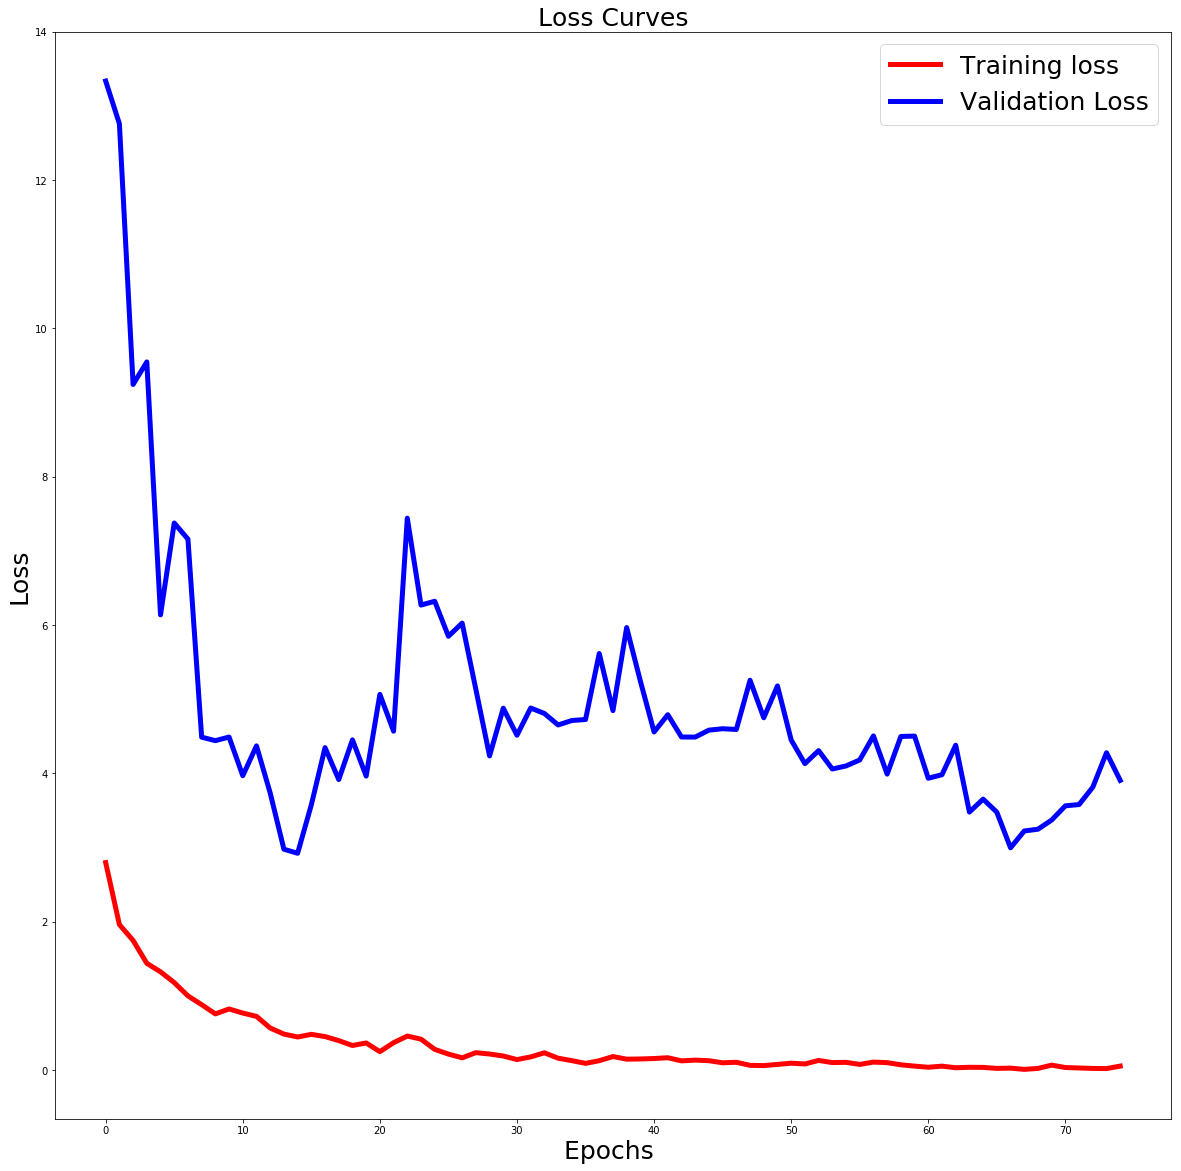

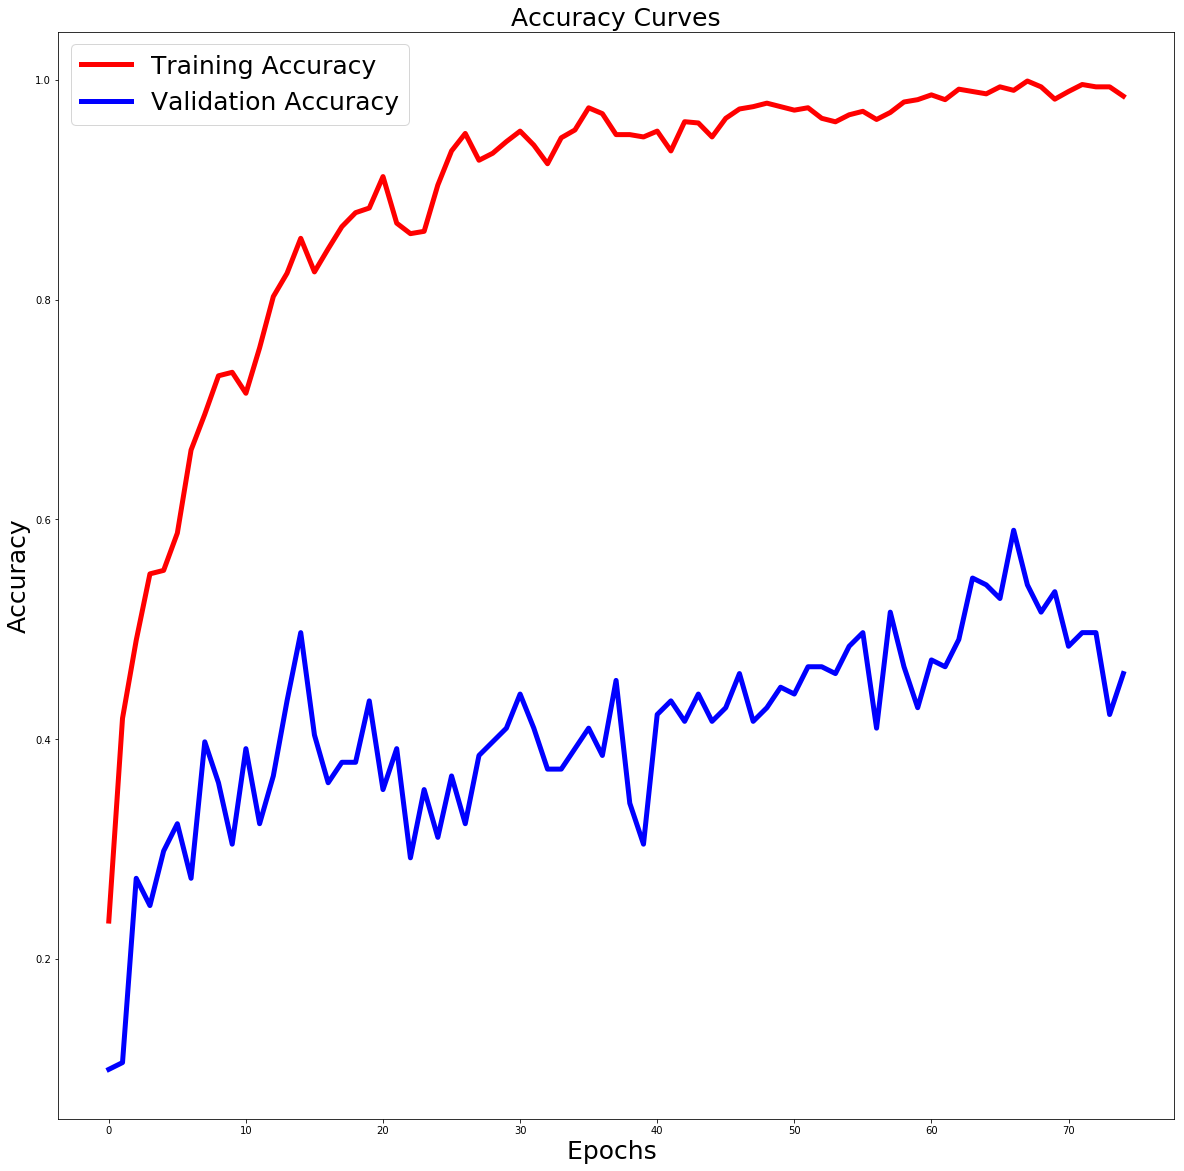

In [16]:
plt.figure(figsize=[20,20])
plt.plot(history.history['loss'],'r',linewidth=5.0)
plt.plot(history.history['val_loss'],'b',linewidth=5.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=25)
plt.xlabel('Epochs ',fontsize=25)
plt.ylabel('Loss',fontsize=25)
plt.title('Loss Curves',fontsize=25)

plt.figure(figsize=[20,20])
plt.plot(history.history['acc'],'r',linewidth=5.0)
plt.plot(history.history['val_acc'],'b',linewidth=5.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=25)
plt.xlabel('Epochs ',fontsize=25)
plt.ylabel('Accuracy',fontsize=25)
plt.title('Accuracy Curves',fontsize=25)

# Data augmentation and preprocessing 

In [21]:
# Batch size
batch_size = 64
# Number of Epochs
epochs = 75

# Data preprocessing and Data Augmentation

datagen_train = ImageDataGenerator(shear_range =0.2 ,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rescale=1./255)

datagen_test = ImageDataGenerator(rescale=1./255)

generator_train = datagen_train.flow_from_directory(directory=train_dir,
                                                    batch_size=batch_size,
                                                    target_size=(224,224),
                                                    shuffle = True,
                                                    class_mode = 'categorical')

generator_test = datagen_test.flow_from_directory(  directory=test_dir,
                                                    batch_size=batch_size,
                                                    target_size=(224,224),
                                                    class_mode = 'categorical',
                                                    shuffle = False)

Found 1071 images belonging to 17 classes.
Found 289 images belonging to 17 classes.


In [22]:
# Using Adam Optimizer 
Adam = keras.optimizers.adam(lr=0.001,beta_1=0.9,amsgrad = True)

# Compile the Model 
# Using categorical crossentropy and accuracy for metrics
model.compile(loss='categorical_crossentropy', optimizer= Adam, metrics=['accuracy'])

# Fit the model 
history= model.fit_generator(generator_train,
                           epochs=epochs,
                           steps_per_epoch=steps_per_epoch,
                           validation_data = generator_test,
                           validation_steps = steps_test)

Epoch 1/75
8/8 [==============================] - 23s 3s/step - loss: 0.7321 - acc: 0.7969 - val_loss: 4.7296 - val_acc: 0.3125
Epoch 2/75
8/8 [==============================] - 17s 2s/step - loss: 0.5796 - acc: 0.7949 - val_loss: 5.3756 - val_acc: 0.3711
Epoch 3/75
8/8 [==============================] - 17s 2s/step - loss: 0.4044 - acc: 0.8584 - val_loss: 3.9540 - val_acc: 0.4609
Epoch 4/75
8/8 [==============================] - 17s 2s/step - loss: 0.4410 - acc: 0.8555 - val_loss: 4.0327 - val_acc: 0.4021
Epoch 5/75
8/8 [==============================] - 17s 2s/step - loss: 0.5206 - acc: 0.8310 - val_loss: 4.6476 - val_acc: 0.4297
Epoch 6/75
8/8 [==============================] - 18s 2s/step - loss: 0.4524 - acc: 0.8535 - val_loss: 5.5624 - val_acc: 0.2500
Epoch 7/75
8/8 [==============================] - 17s 2s/step - loss: 0.4465 - acc: 0.8558 - val_loss: 4.2710 - val_acc: 0.5258
Epoch 8/75
8/8 [==============================] - 18s 2s/step - loss: 0.4537 - acc: 0.8535 - val_loss: 4

Text(0.5,1,'Accuracy Curves')

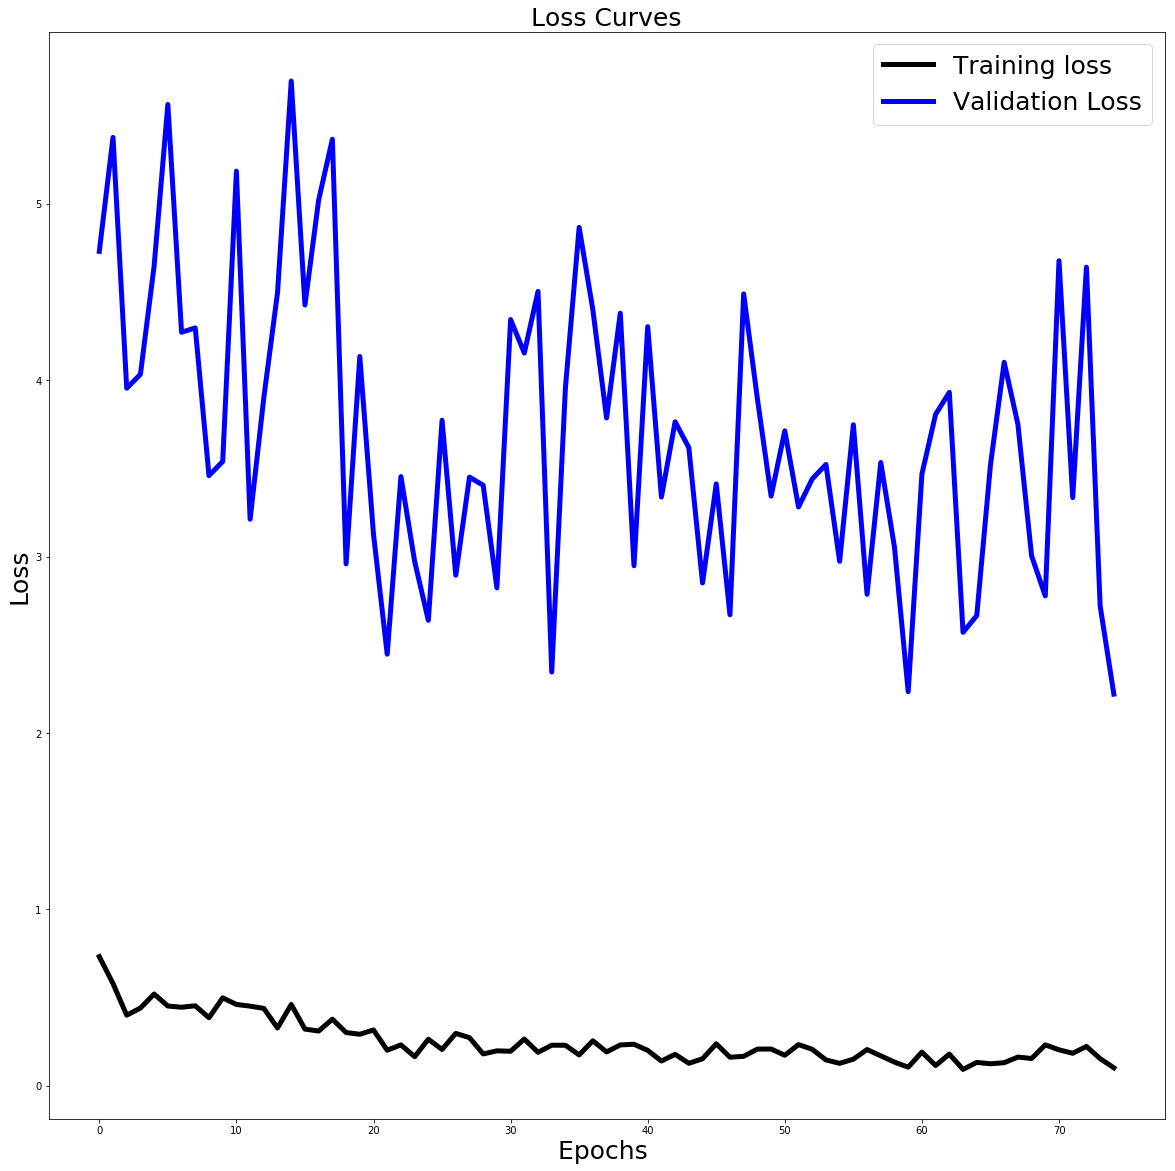

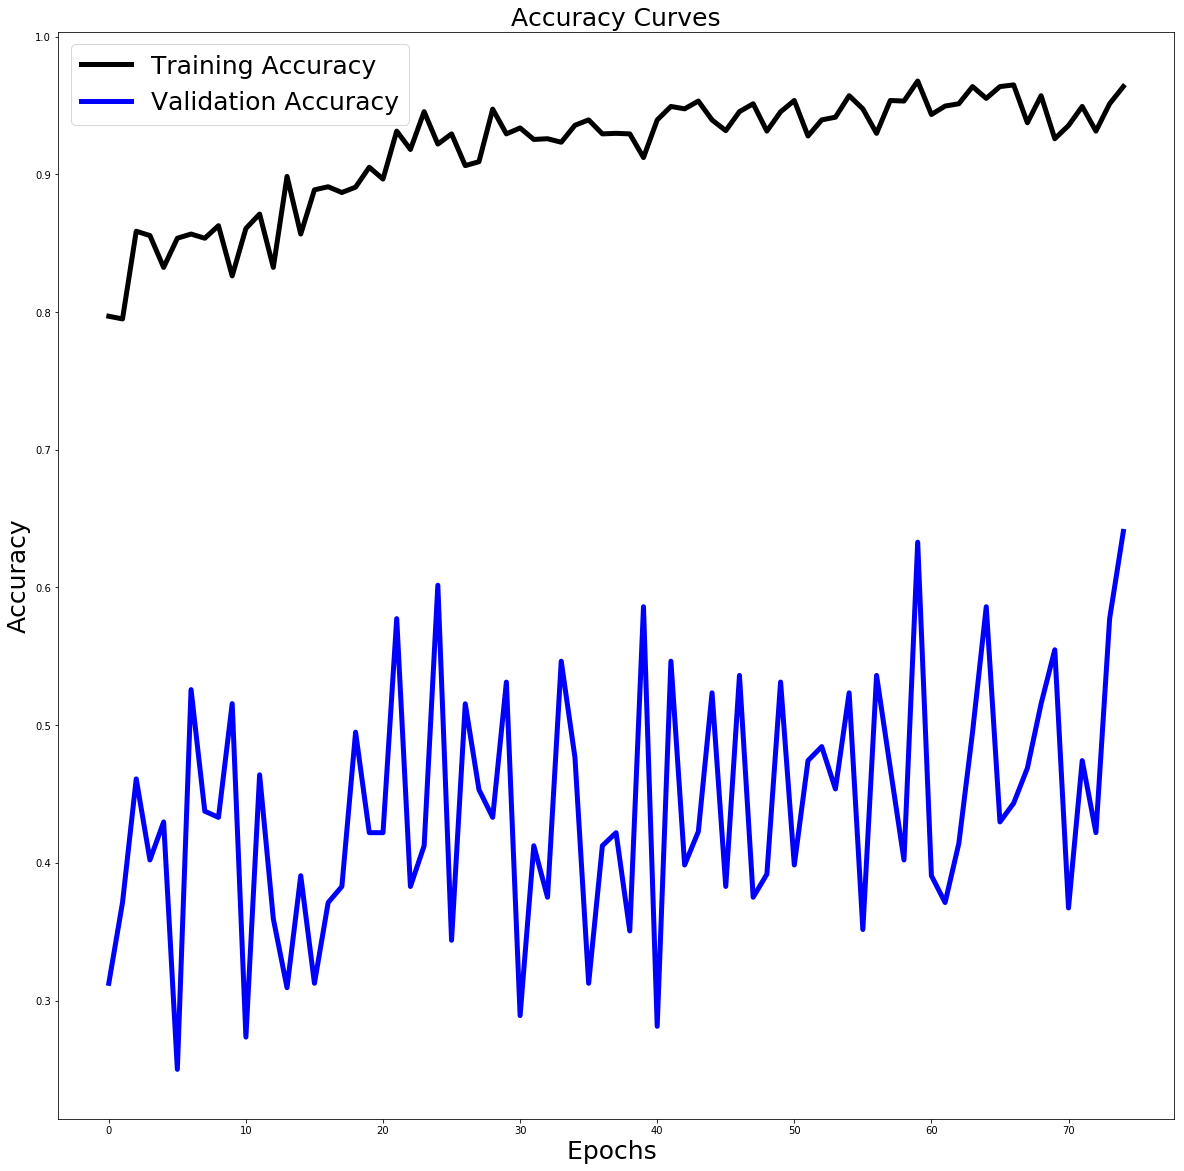

In [23]:
plt.figure(figsize=[20,20])
plt.plot(history.history['loss'],'k',linewidth=5.0)
plt.plot(history.history['val_loss'],'b',linewidth=5.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=25)
plt.xlabel('Epochs ',fontsize=25)
plt.ylabel('Loss',fontsize=25)
plt.title('Loss Curves',fontsize=25)

plt.figure(figsize=[20,20])
plt.plot(history.history['acc'],'k',linewidth=5.0)
plt.plot(history.history['val_acc'],'b',linewidth=5.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=25)
plt.xlabel('Epochs ',fontsize=25)
plt.ylabel('Accuracy',fontsize=25)
plt.title('Accuracy Curves',fontsize=25)

# Training on pre-trained network : Transfer Learning : Fine Tuning top layers

In [13]:
base_model = inception_v3.InceptionV3(weights = 'imagenet', include_top = False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
predictions = Dense(17, activation = 'softmax')(x)

model = Model(inputs=base_model.input, outputs = predictions)


for layer in base_model.layers:
    
    layer.trainable = False 

    
              
optimizer = keras.optimizers.Adam(lr=0.0001,beta_1=0.9,amsgrad=True)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history= model.fit_generator(generator_train,
                           epochs=epochs,
                           steps_per_epoch=steps_per_epoch,
                           validation_data = generator_test,
                           validation_steps = steps_test)


Epoch 1/75
4/4 [==============================] - 19s 5s/step - loss: 2.8257 - acc: 0.1039 - val_loss: 2.8144 - val_acc: 0.1211
Epoch 2/75
4/4 [==============================] - 6s 1s/step - loss: 2.5190 - acc: 0.3066 - val_loss: 2.5638 - val_acc: 0.3939
Epoch 3/75
4/4 [==============================] - 5s 1s/step - loss: 2.2422 - acc: 0.4964 - val_loss: 2.6676 - val_acc: 0.0909
Epoch 4/75
4/4 [==============================] - 5s 1s/step - loss: 2.0104 - acc: 0.6341 - val_loss: 2.4104 - val_acc: 0.0909
Epoch 5/75
4/4 [==============================] - 5s 1s/step - loss: 1.7495 - acc: 0.7431 - val_loss: 2.0311 - val_acc: 0.2727
Epoch 6/75
4/4 [==============================] - 5s 1s/step - loss: 1.5832 - acc: 0.7891 - val_loss: 1.7775 - val_acc: 0.3939
Epoch 7/75
4/4 [==============================] - 6s 1s/step - loss: 1.3399 - acc: 0.8291 - val_loss: 1.7052 - val_acc: 0.4242
Epoch 8/75
4/4 [==============================] - 5s 1s/step - loss: 1.1885 - acc: 0.8530 - val_loss: 1.6028 -

4/4 [==============================] - 5s 1s/step - loss: 0.0611 - acc: 1.0000 - val_loss: 1.1174 - val_acc: 0.6667
Epoch 66/75
4/4 [==============================] - 5s 1s/step - loss: 0.0591 - acc: 1.0000 - val_loss: 1.0019 - val_acc: 0.7273
Epoch 67/75
4/4 [==============================] - 6s 1s/step - loss: 0.0473 - acc: 1.0000 - val_loss: 0.9626 - val_acc: 0.6970
Epoch 68/75
4/4 [==============================] - 5s 1s/step - loss: 0.0514 - acc: 1.0000 - val_loss: 0.8995 - val_acc: 0.6970
Epoch 69/75
4/4 [==============================] - 5s 1s/step - loss: 0.0501 - acc: 1.0000 - val_loss: 0.9754 - val_acc: 0.7273
Epoch 70/75
4/4 [==============================] - 5s 1s/step - loss: 0.0437 - acc: 1.0000 - val_loss: 1.0488 - val_acc: 0.6970
Epoch 71/75
4/4 [==============================] - 5s 1s/step - loss: 0.0562 - acc: 0.9955 - val_loss: 0.9900 - val_acc: 0.7273
Epoch 72/75
4/4 [==============================] - 6s 1s/step - loss: 0.0416 - acc: 1.0000 - val_loss: 0.8193 - val_

Text(0.5,1,'Accuracy Curves using Inception_V3')

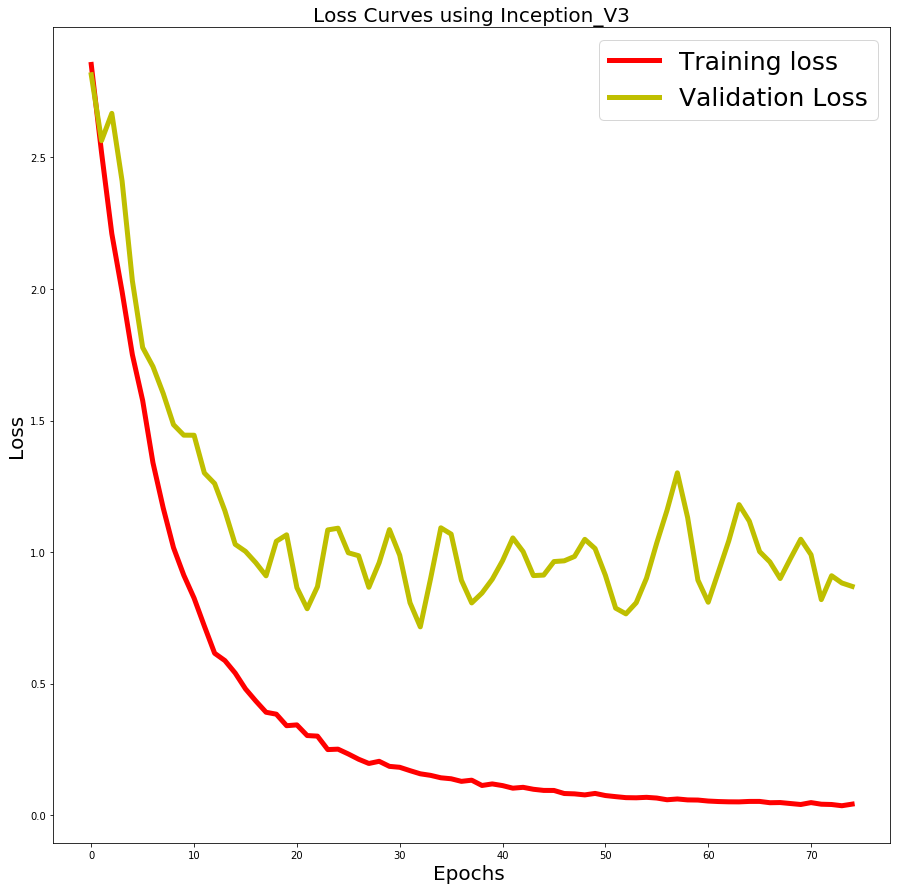

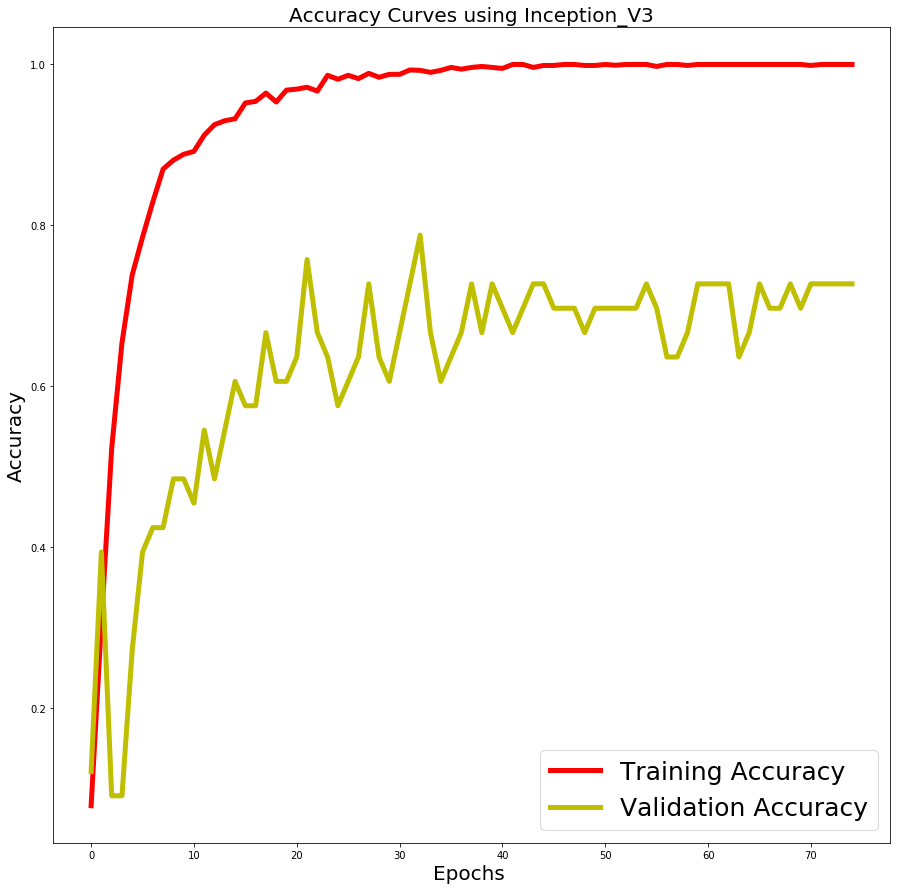

In [14]:
# Plot showing training loss and validation loss
plt.figure(figsize=[15,15])
plt.plot(history.history['loss'],'r',linewidth=5.0)
plt.plot(history.history['val_loss'],'y',linewidth=5.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=25)
plt.xlabel('Epochs ',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.title('Loss Curves using Inception_V3',fontsize=20)


# Plot showing training accuracy and validation accuracy 
plt.figure(figsize=[15,15])
plt.plot(history.history['acc'],'r',linewidth=5.0)
plt.plot(history.history['val_acc'],'y',linewidth=5.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=25)
plt.xlabel('Epochs ',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('Accuracy Curves using Inception_V3',fontsize=20)


In [8]:
base_model = resnet50.ResNet50(weights = 'imagenet', include_top = False, input_shape = (224,224,3))


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
predictions = Dense(17, activation = 'softmax')(x)

model = Model(inputs=base_model.input, outputs = predictions)


for layer in base_model.layers:
    
    layer.trainable = False 

   
              
optimizer = keras.optimizers.Adam(lr=0.0001,beta_1=0.9,amsgrad=True)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history= model.fit_generator(generator_train,
                           epochs=epochs,
                           steps_per_epoch=steps_per_epoch,
                           validation_data = generator_test,
                           validation_steps = steps_test)


Epoch 1/75
4/4 [==============================] - 19s 5s/step - loss: 2.7852 - acc: 0.1162 - val_loss: 3.0090 - val_acc: 0.0664
Epoch 2/75
4/4 [==============================] - 7s 2s/step - loss: 2.1334 - acc: 0.4503 - val_loss: 3.5978 - val_acc: 0.0000e+00
Epoch 3/75
4/4 [==============================] - 6s 2s/step - loss: 1.6181 - acc: 0.7056 - val_loss: 3.6052 - val_acc: 0.0000e+00
Epoch 4/75
4/4 [==============================] - 6s 2s/step - loss: 1.2039 - acc: 0.8237 - val_loss: 3.5690 - val_acc: 0.0000e+00
Epoch 5/75
4/4 [==============================] - 6s 2s/step - loss: 0.9260 - acc: 0.8603 - val_loss: 3.5173 - val_acc: 0.0000e+00
Epoch 6/75
4/4 [==============================] - 8s 2s/step - loss: 0.6806 - acc: 0.9121 - val_loss: 3.4931 - val_acc: 0.0000e+00
Epoch 7/75
4/4 [==============================] - 6s 2s/step - loss: 0.5361 - acc: 0.9235 - val_loss: 3.5228 - val_acc: 0.0000e+00
Epoch 8/75
4/4 [==============================] - 6s 2s/step - loss: 0.4404 - acc: 0.9

Text(0.5,1,'Accuracy Curves using ResNet50')

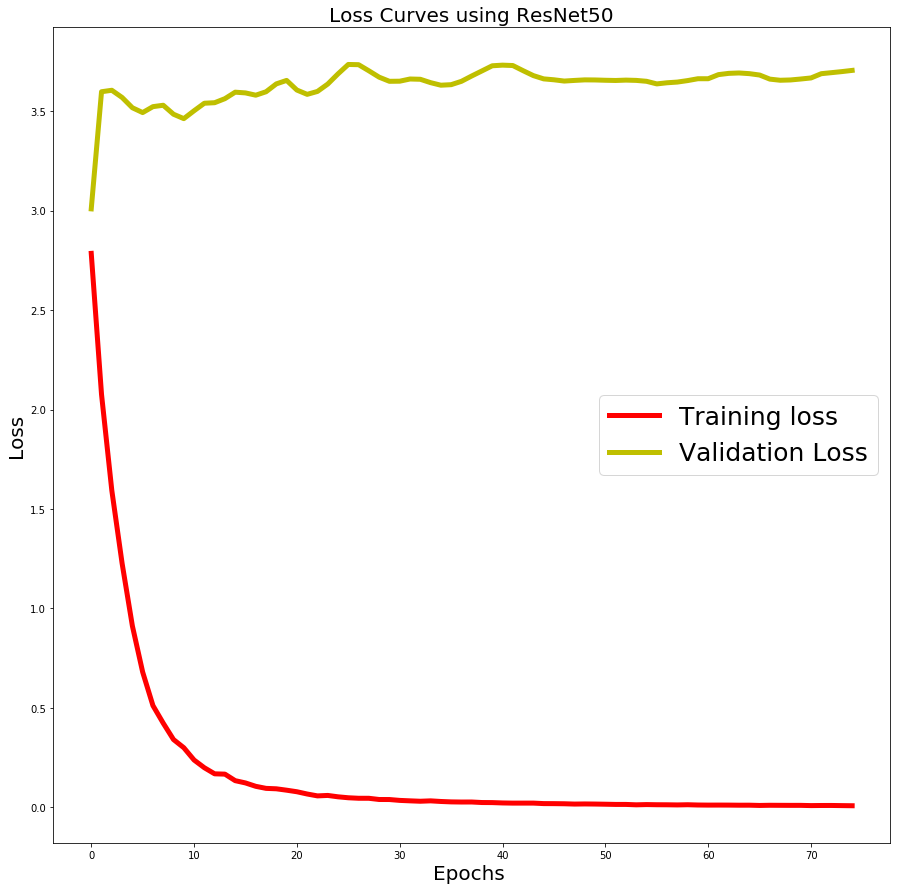

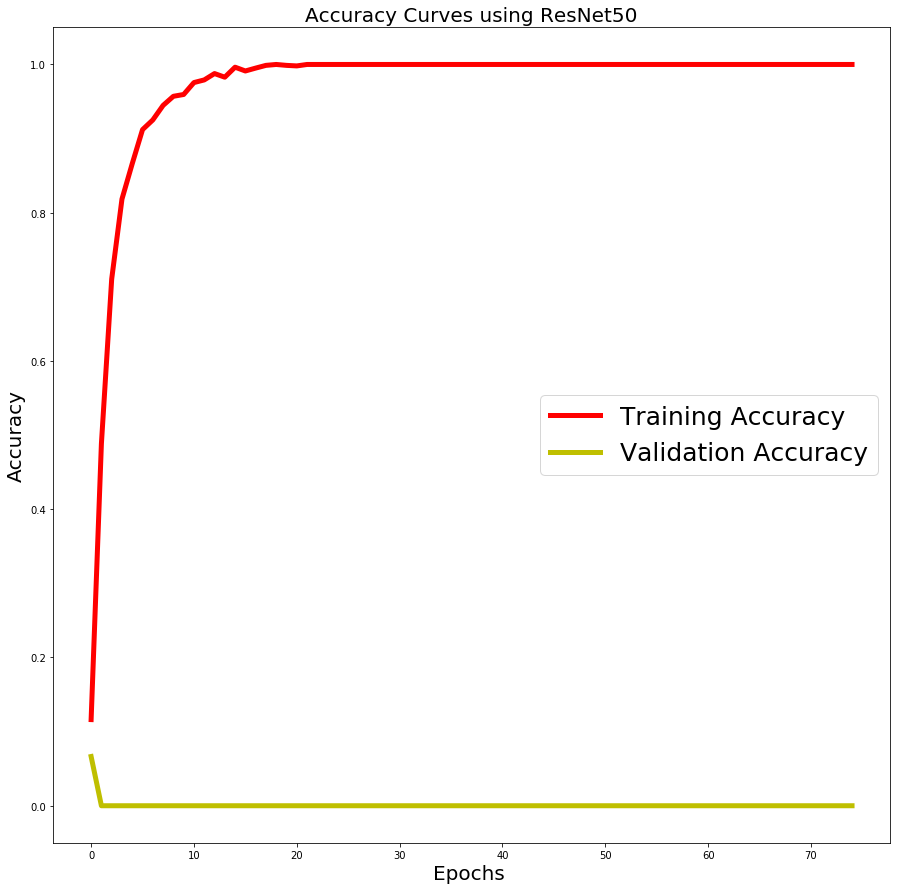

In [9]:
# Plot showing training loss and validation loss
plt.figure(figsize=[15,15])
plt.plot(history.history['loss'],'r',linewidth=5.0)
plt.plot(history.history['val_loss'],'y',linewidth=5.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=25)
plt.xlabel('Epochs ',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.title('Loss Curves using ResNet50',fontsize=20)


# Plot showing training accuracy and validation accuracy 
plt.figure(figsize=[15,15])
plt.plot(history.history['acc'],'r',linewidth=5.0)
plt.plot(history.history['val_acc'],'y',linewidth=5.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=25)
plt.xlabel('Epochs ',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('Accuracy Curves using ResNet50',fontsize=20)


In [13]:
base_model = mobilenet.MobileNet(input_shape=(224,224,3),include_top= False, weights='imagenet')

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
predictions = Dense(17, activation = 'softmax')(x)

model = Model(inputs=base_model.input, outputs = predictions)


for layer in base_model.layers:
    
    layer.trainable = False 

   
              
optimizer = keras.optimizers.Adam(lr=0.0001,beta_1=0.9,amsgrad=True)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history= model.fit_generator(generator_train,
                           epochs=epochs,
                           steps_per_epoch=steps_per_epoch,
                           validation_data = generator_test,
                           validation_steps = steps_test)


Found 1071 images belonging to 17 classes.
Found 289 images belonging to 17 classes.
17227776/17225924 [==============================] - 2s 0us/step
Epoch 1/75
4/4 [==============================] - 8s 2s/step - loss: 2.9516 - acc: 0.0684 - val_loss: 2.7784 - val_acc: 0.1094
Epoch 2/75
4/4 [==============================] - 4s 1s/step - loss: 2.6820 - acc: 0.1289 - val_loss: 2.6118 - val_acc: 0.1818
Epoch 3/75
4/4 [==============================] - 5s 1s/step - loss: 2.3536 - acc: 0.3019 - val_loss: 2.4036 - val_acc: 0.2578
Epoch 4/75
4/4 [==============================] - 6s 1s/step - loss: 2.1155 - acc: 0.4180 - val_loss: 2.2578 - val_acc: 0.3516
Epoch 5/75
4/4 [==============================] - 5s 1s/step - loss: 1.8934 - acc: 0.5705 - val_loss: 2.1907 - val_acc: 0.3594
Epoch 6/75
4/4 [==============================] - 6s 1s/step - loss: 1.6594 - acc: 0.6152 - val_loss: 2.1321 - val_acc: 0.3516
Epoch 7/75
4/4 [==============================] - 5s 1s/step - loss: 1.5227 - acc: 0.667

Epoch 63/75
4/4 [==============================] - 4s 1s/step - loss: 0.2152 - acc: 0.9446 - val_loss: 1.1267 - val_acc: 0.6719
Epoch 64/75
4/4 [==============================] - 6s 1s/step - loss: 0.1719 - acc: 0.9707 - val_loss: 1.1316 - val_acc: 0.6719
Epoch 65/75
4/4 [==============================] - 6s 1s/step - loss: 0.1557 - acc: 0.9746 - val_loss: 1.1591 - val_acc: 0.6641
Epoch 66/75
4/4 [==============================] - 5s 1s/step - loss: 0.1820 - acc: 0.9608 - val_loss: 1.1447 - val_acc: 0.6641
Epoch 67/75
4/4 [==============================] - 6s 1s/step - loss: 0.1774 - acc: 0.9570 - val_loss: 1.1230 - val_acc: 0.6719
Epoch 68/75
4/4 [==============================] - 5s 1s/step - loss: 0.2113 - acc: 0.9440 - val_loss: 1.1290 - val_acc: 0.6719
Epoch 69/75
4/4 [==============================] - 6s 1s/step - loss: 0.1901 - acc: 0.9551 - val_loss: 1.1674 - val_acc: 0.6641
Epoch 70/75
4/4 [==============================] - 5s 1s/step - loss: 0.1870 - acc: 0.9541 - val_loss: 1

Text(0.5,1,'Accuracy Curves using mobileNet')

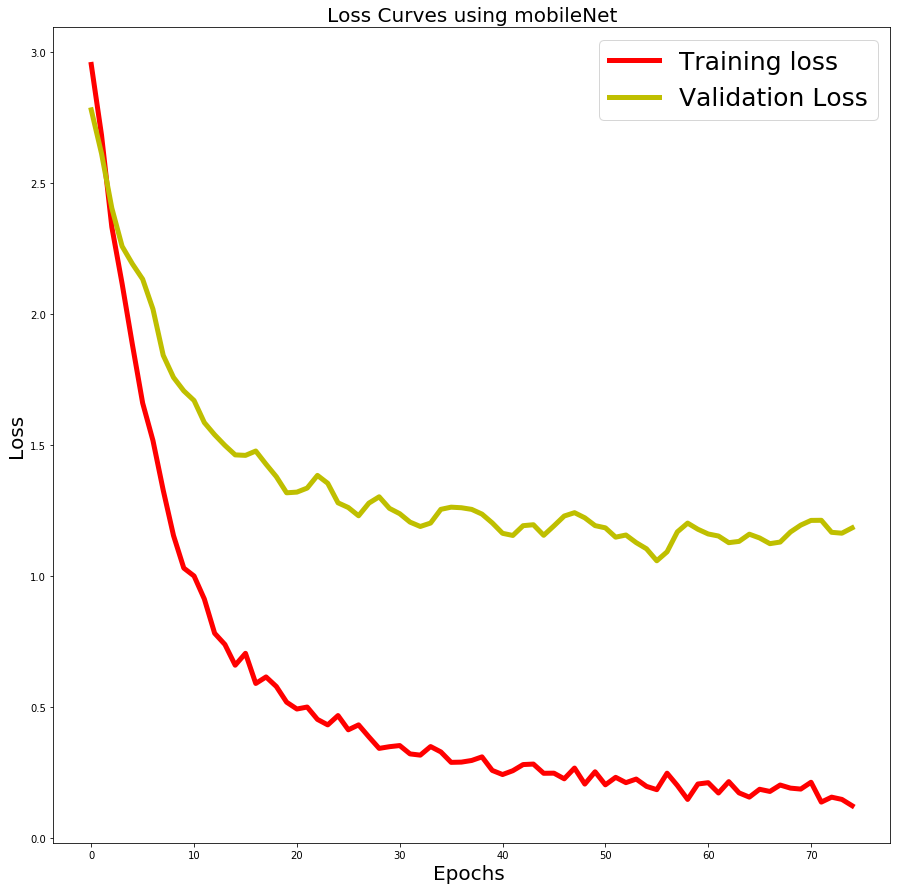

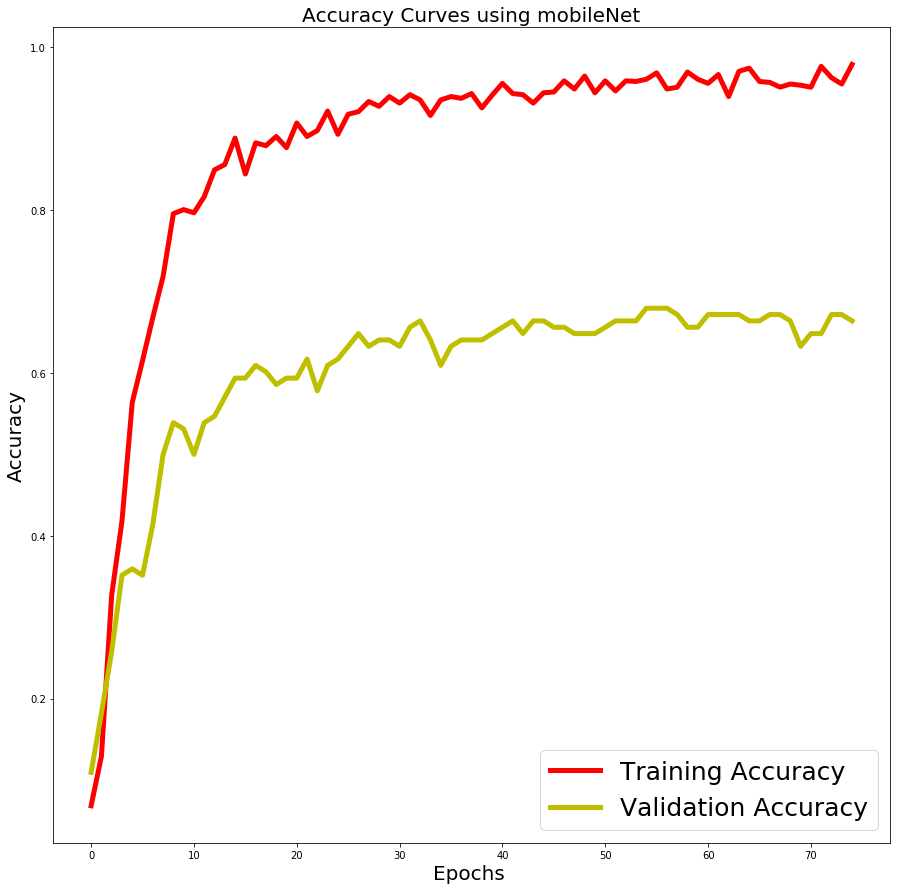

In [14]:
# Plot showing training loss and validation loss
plt.figure(figsize=[15,15])
plt.plot(history.history['loss'],'r',linewidth=5.0)
plt.plot(history.history['val_loss'],'y',linewidth=5.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=25)
plt.xlabel('Epochs ',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.title('Loss Curves using mobileNet',fontsize=20)


# Plot showing training accuracy and validation accuracy 
plt.figure(figsize=[15,15])
plt.plot(history.history['acc'],'r',linewidth=5.0)
plt.plot(history.history['val_acc'],'y',linewidth=5.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=25)
plt.xlabel('Epochs ',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('Accuracy Curves using mobileNet',fontsize=20)


In [15]:
base_model = keras.applications.xception.Xception(include_top=False, weights='imagenet',input_shape=None)


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
predictions = Dense(17, activation = 'softmax')(x)

model = Model(inputs=base_model.input, outputs = predictions)


for layer in base_model.layers:
    
    layer.trainable = False 

   
              
optimizer = keras.optimizers.Adam(lr=0.0001,beta_1=0.9,amsgrad=True)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history= model.fit_generator(generator_train,
                           epochs=epochs,
                           steps_per_epoch=steps_per_epoch,
                           validation_data = generator_test,
                           validation_steps = steps_test)


91889664/91884032 [==============================] - 7s 0us/step
Found 1071 images belonging to 17 classes.
Found 289 images belonging to 17 classes.
83689472/83683744 [==============================] - 7s 0us/step
Epoch 1/75
4/4 [==============================] - 12s 3s/step - loss: 2.8056 - acc: 0.0938 - val_loss: 2.7486 - val_acc: 0.1328
Epoch 2/75
4/4 [==============================] - 6s 1s/step - loss: 2.6880 - acc: 0.2500 - val_loss: 2.5708 - val_acc: 0.1515
Epoch 3/75
4/4 [==============================] - 7s 2s/step - loss: 2.5327 - acc: 0.4260 - val_loss: 2.3807 - val_acc: 0.3438
Epoch 4/75
4/4 [==============================] - 5s 1s/step - loss: 2.3957 - acc: 0.5117 - val_loss: 2.3706 - val_acc: 0.2121
Epoch 5/75
4/4 [==============================] - 6s 1s/step - loss: 2.2856 - acc: 0.5287 - val_loss: 2.5593 - val_acc: 0.1250
Epoch 6/75
4/4 [==============================] - 7s 2s/step - loss: 2.1403 - acc: 0.6699 - val_loss: 2.0413 - val_acc: 0.4531
Epoch 7/75
4/4 [======

Text(0.5,1,'Accuracy Curves using xception')

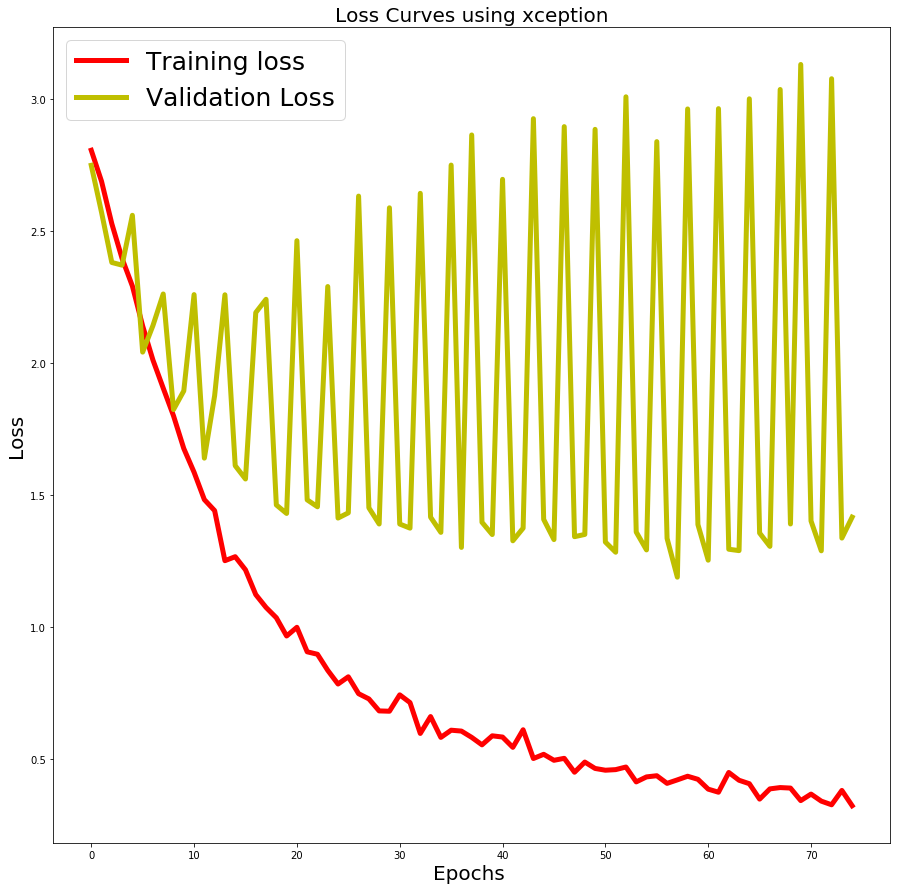

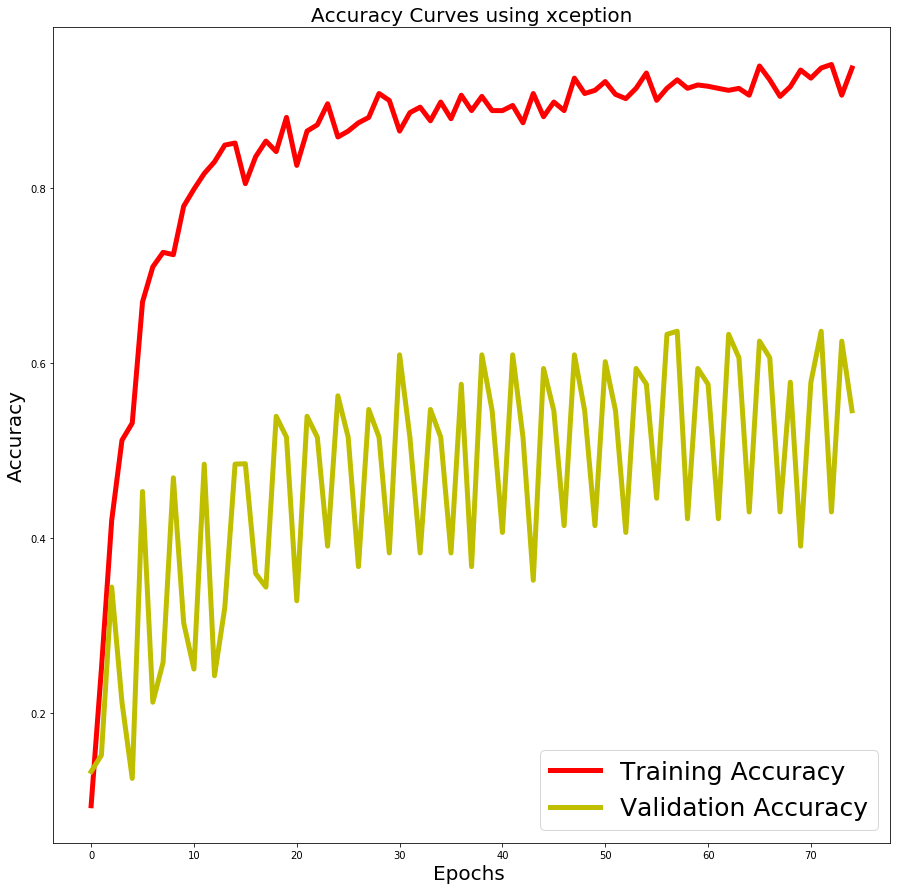

In [16]:
# Plot showing training loss and validation loss
plt.figure(figsize=[15,15])
plt.plot(history.history['loss'],'r',linewidth=5.0)
plt.plot(history.history['val_loss'],'y',linewidth=5.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=25)
plt.xlabel('Epochs ',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.title('Loss Curves using xception',fontsize=20)


# Plot showing training accuracy and validation accuracy 
plt.figure(figsize=[15,15])
plt.plot(history.history['acc'],'r',linewidth=5.0)
plt.plot(history.history['val_acc'],'y',linewidth=5.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=25)
plt.xlabel('Epochs ',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('Accuracy Curves using xception',fontsize=20)


In [7]:
base_model = vgg19.VGG19(weights = 'imagenet', include_top = False)


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
predictions = Dense(17, activation = 'softmax')(x)

model = Model(inputs=base_model.input, outputs = predictions)


for layer in base_model.layers:
    
    layer.trainable = False 

              
optimizer = keras.optimizers.Adam(lr=0.0001,beta_1=0.9,amsgrad=True)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history= model.fit_generator(generator_train,
                           epochs=epochs,
                           steps_per_epoch=steps_per_epoch,
                           validation_data = generator_test,
                           validation_steps = steps_test)


Epoch 1/75
8/8 [==============================] - 32s 4s/step - loss: 2.8818 - acc: 0.0625 - val_loss: 2.8249 - val_acc: 0.0781
Epoch 2/75
8/8 [==============================] - 22s 3s/step - loss: 2.7637 - acc: 0.1844 - val_loss: 2.7607 - val_acc: 0.1739
Epoch 3/75
8/8 [==============================] - 14s 2s/step - loss: 2.6916 - acc: 0.3384 - val_loss: 2.6944 - val_acc: 0.2857
Epoch 4/75
8/8 [==============================] - 14s 2s/step - loss: 2.6331 - acc: 0.4045 - val_loss: 2.6510 - val_acc: 0.3913
Epoch 5/75
8/8 [==============================] - 14s 2s/step - loss: 2.5653 - acc: 0.5206 - val_loss: 2.6200 - val_acc: 0.3478
Epoch 6/75
8/8 [==============================] - 14s 2s/step - loss: 2.5199 - acc: 0.4933 - val_loss: 2.5809 - val_acc: 0.3665
Epoch 7/75
8/8 [==============================] - 14s 2s/step - loss: 2.4419 - acc: 0.5614 - val_loss: 2.5353 - val_acc: 0.4286
Epoch 8/75
8/8 [==============================] - 14s 2s/step - loss: 2.3784 - acc: 0.6661 - val_loss: 2

Text(0.5,1,'Accuracy Curves using VGG19')

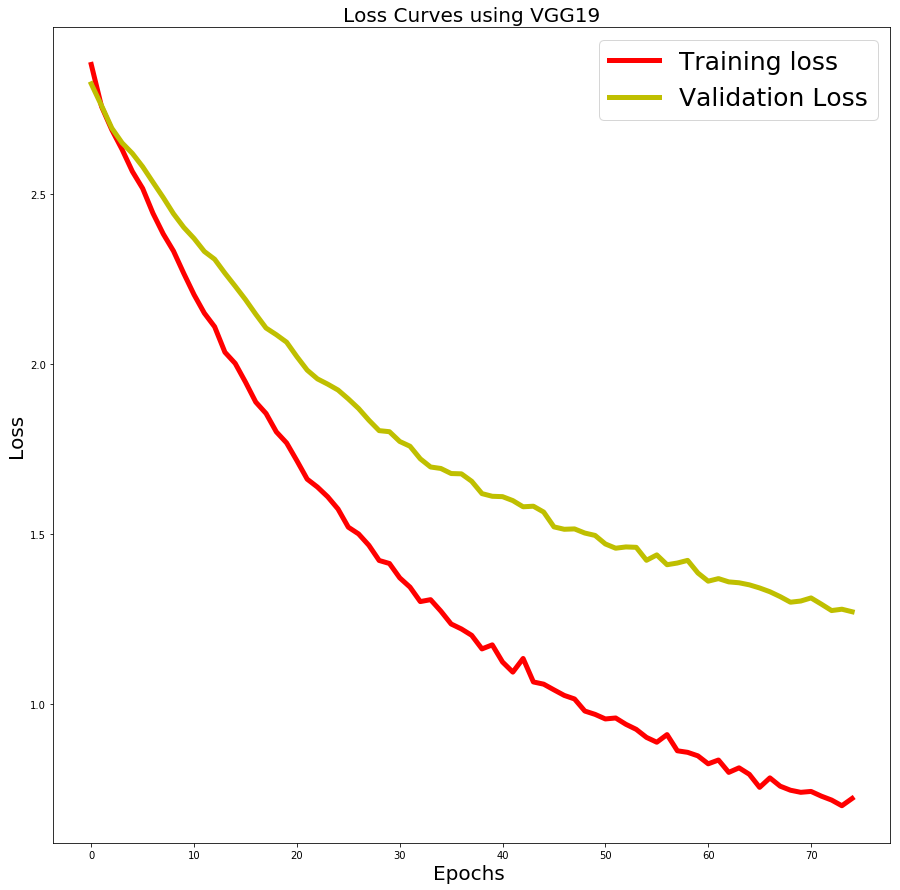

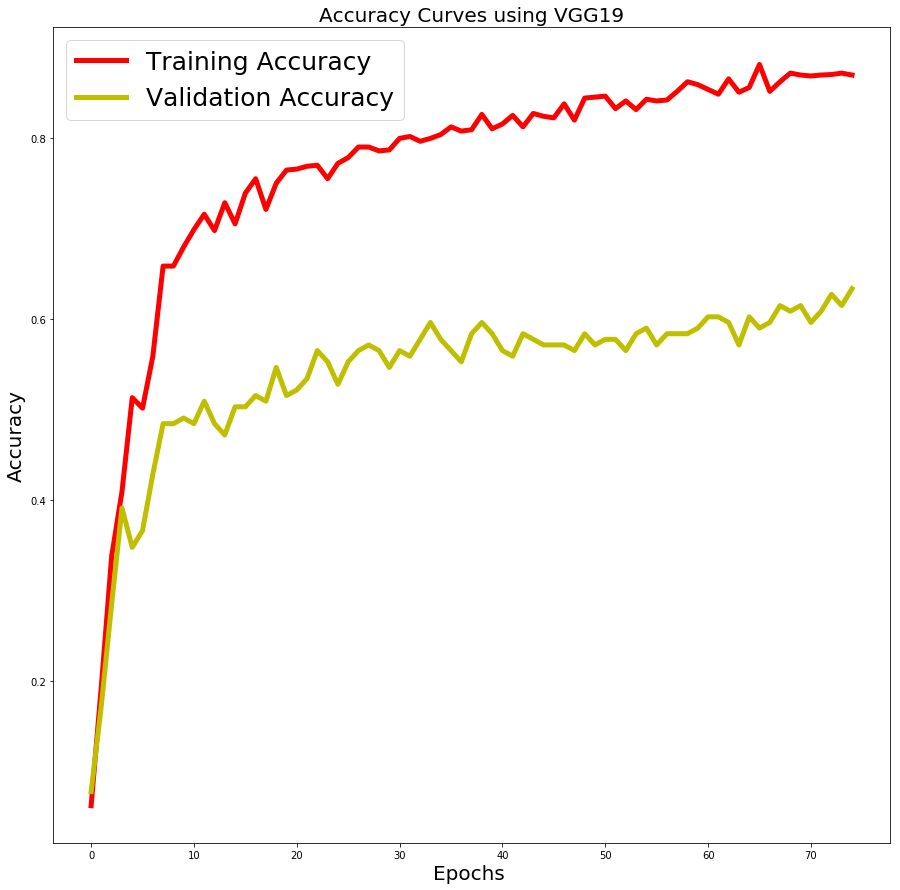

In [10]:
# Plot showing training loss and validation loss
plt.figure(figsize=[15,15])
plt.plot(history.history['loss'],'r',linewidth=5.0)
plt.plot(history.history['val_loss'],'y',linewidth=5.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=25)
plt.xlabel('Epochs ',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.title('Loss Curves using VGG19',fontsize=20)


# Plot showing training accuracy and validation accuracy 
plt.figure(figsize=[15,15])
plt.plot(history.history['acc'],'r',linewidth=5.0)
plt.plot(history.history['val_acc'],'y',linewidth=5.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=25)
plt.xlabel('Epochs ',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('Accuracy Curves using VGG19',fontsize=20)


In [11]:
base_model = vgg16.VGG16(weights = 'imagenet', include_top = False)


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
predictions = Dense(17, activation = 'softmax')(x)

model = Model(inputs=base_model.input, outputs = predictions)


for layer in base_model.layers:
    
    layer.trainable = False 
              
optimizer = keras.optimizers.Adam(lr=0.0001,beta_1=0.9,amsgrad=True)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history= model.fit_generator(generator_train,
                           epochs=epochs,
                           steps_per_epoch=steps_per_epoch,
                           validation_data = generator_test,
                           validation_steps = steps_test)


Epoch 1/75
8/8 [==============================] - 18s 2s/step - loss: 2.8479 - acc: 0.0444 - val_loss: 2.7723 - val_acc: 0.1304
Epoch 2/75
8/8 [==============================] - 12s 2s/step - loss: 2.7607 - acc: 0.1372 - val_loss: 2.7329 - val_acc: 0.1739
Epoch 3/75
8/8 [==============================] - 13s 2s/step - loss: 2.6840 - acc: 0.3178 - val_loss: 2.6988 - val_acc: 0.2671
Epoch 4/75
8/8 [==============================] - 13s 2s/step - loss: 2.6200 - acc: 0.3872 - val_loss: 2.6610 - val_acc: 0.3168
Epoch 5/75
8/8 [==============================] - 13s 2s/step - loss: 2.5528 - acc: 0.4968 - val_loss: 2.6085 - val_acc: 0.4907
Epoch 6/75
8/8 [==============================] - 14s 2s/step - loss: 2.4859 - acc: 0.5645 - val_loss: 2.5637 - val_acc: 0.4720
Epoch 7/75
8/8 [==============================] - 12s 2s/step - loss: 2.4399 - acc: 0.6014 - val_loss: 2.5115 - val_acc: 0.5155
Epoch 8/75
8/8 [==============================] - 13s 2s/step - loss: 2.3428 - acc: 0.6502 - val_loss: 2

Text(0.5,1,'Accuracy Curves using VGG_16')

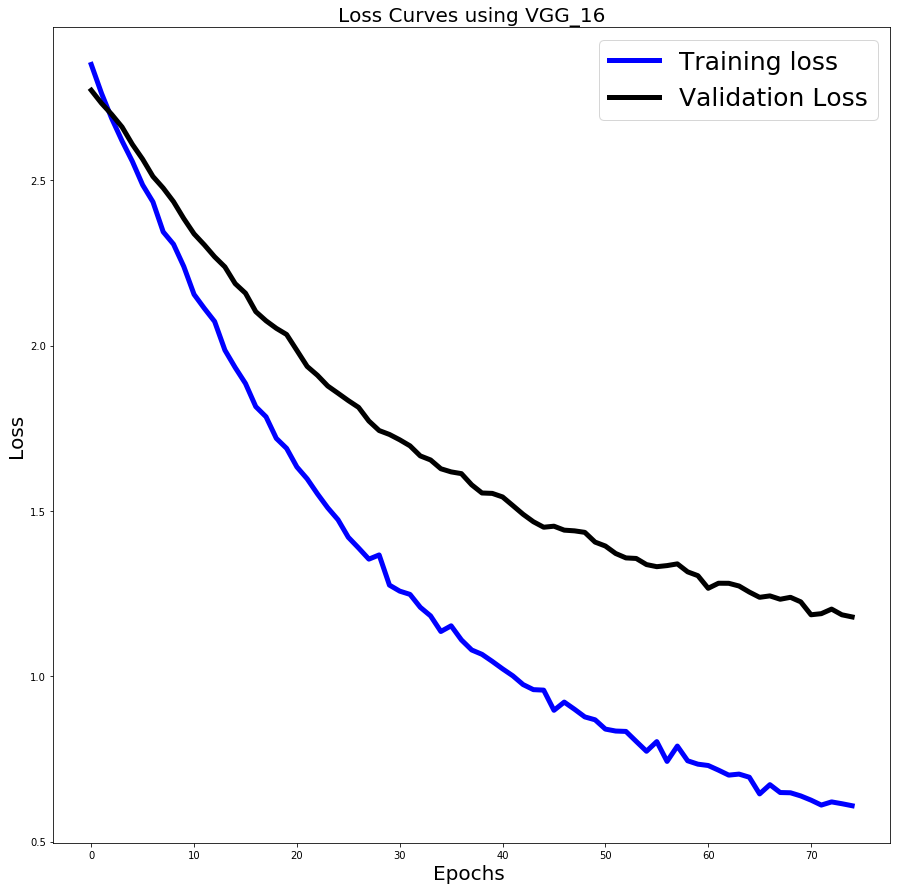

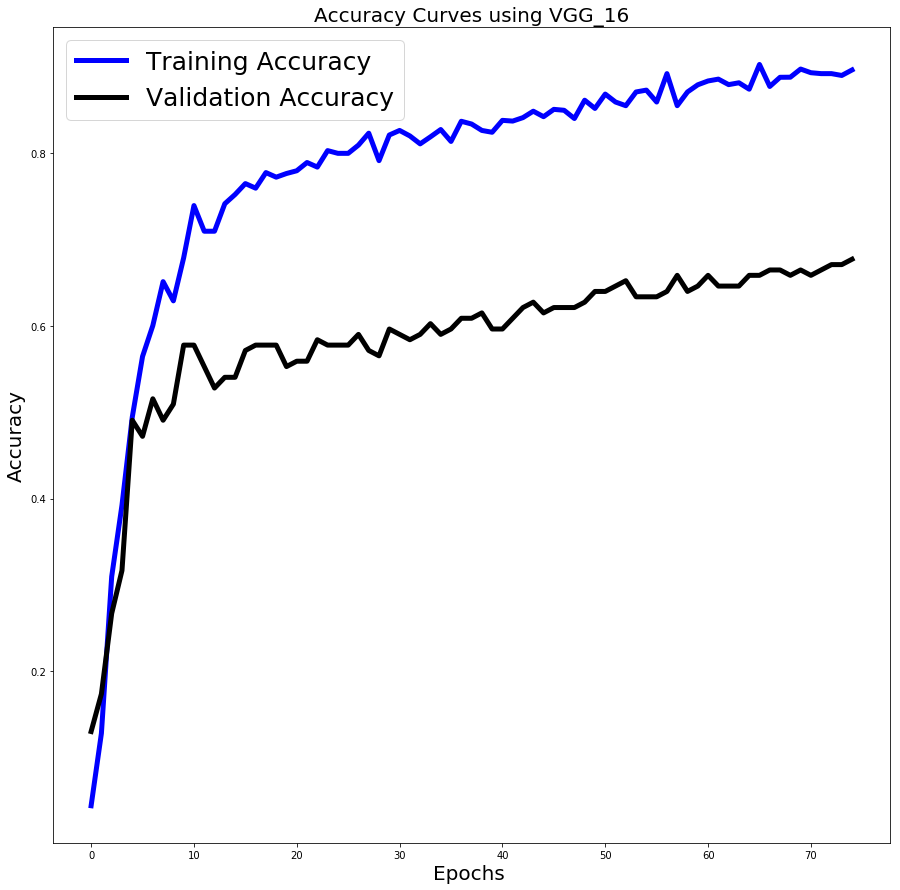

In [12]:
# Plot showing training loss and validation loss
plt.figure(figsize=[15,15])
plt.plot(history.history['loss'],'b',linewidth=5.0)
plt.plot(history.history['val_loss'],'k',linewidth=5.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=25)
plt.xlabel('Epochs ',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.title('Loss Curves using VGG_16',fontsize=20)


# Plot showing training accuracy and validation accuracy 
plt.figure(figsize=[15,15])
plt.plot(history.history['acc'],'b',linewidth=5.0)
plt.plot(history.history['val_acc'],'k',linewidth=5.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=25)
plt.xlabel('Epochs ',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('Accuracy Curves using VGG_16',fontsize=20)
